In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [2]:
df_gi=pd.read_csv('glass_identification.csv',header=None)

In [3]:
df_gi.columns=['Id','RI','Na','Mg','Ai','Si','k','Ca','Ba','Fe','Type']

In [4]:

df_gi

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df_gi.shape

(214, 11)

In [6]:
df_gi.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Ai      float64
Si      float64
k       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
df_gi.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Ai      0
Si      0
k       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
#observation: here we cheched the missing value in each feature and observed that there are no missing values
for i in df_gi.columns:
    print(df_gi[i].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Name: Id, Length: 214, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Name: RI, Length: 214, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Name: Na, Length: 214, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Name: Mg, Length: 214, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Name: Ai, Length: 214, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211   

<Axes: >

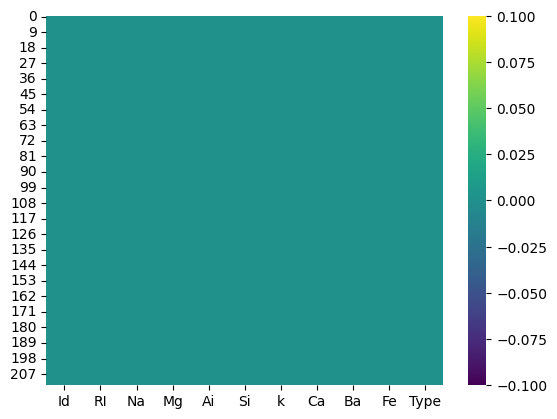

In [9]:
sns.heatmap(df_gi.isnull(),cmap='viridis')

In [ ]:
#now it is confirmed that there are no missing values


In [10]:
df_gi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Ai      214 non-null    float64
 5   Si      214 non-null    float64
 6   k       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
#here it is clear that  the feature are numerical type of float 64 and int64 and index ranges from 0 to 213

In [11]:
df_gi.describe(include='all')

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


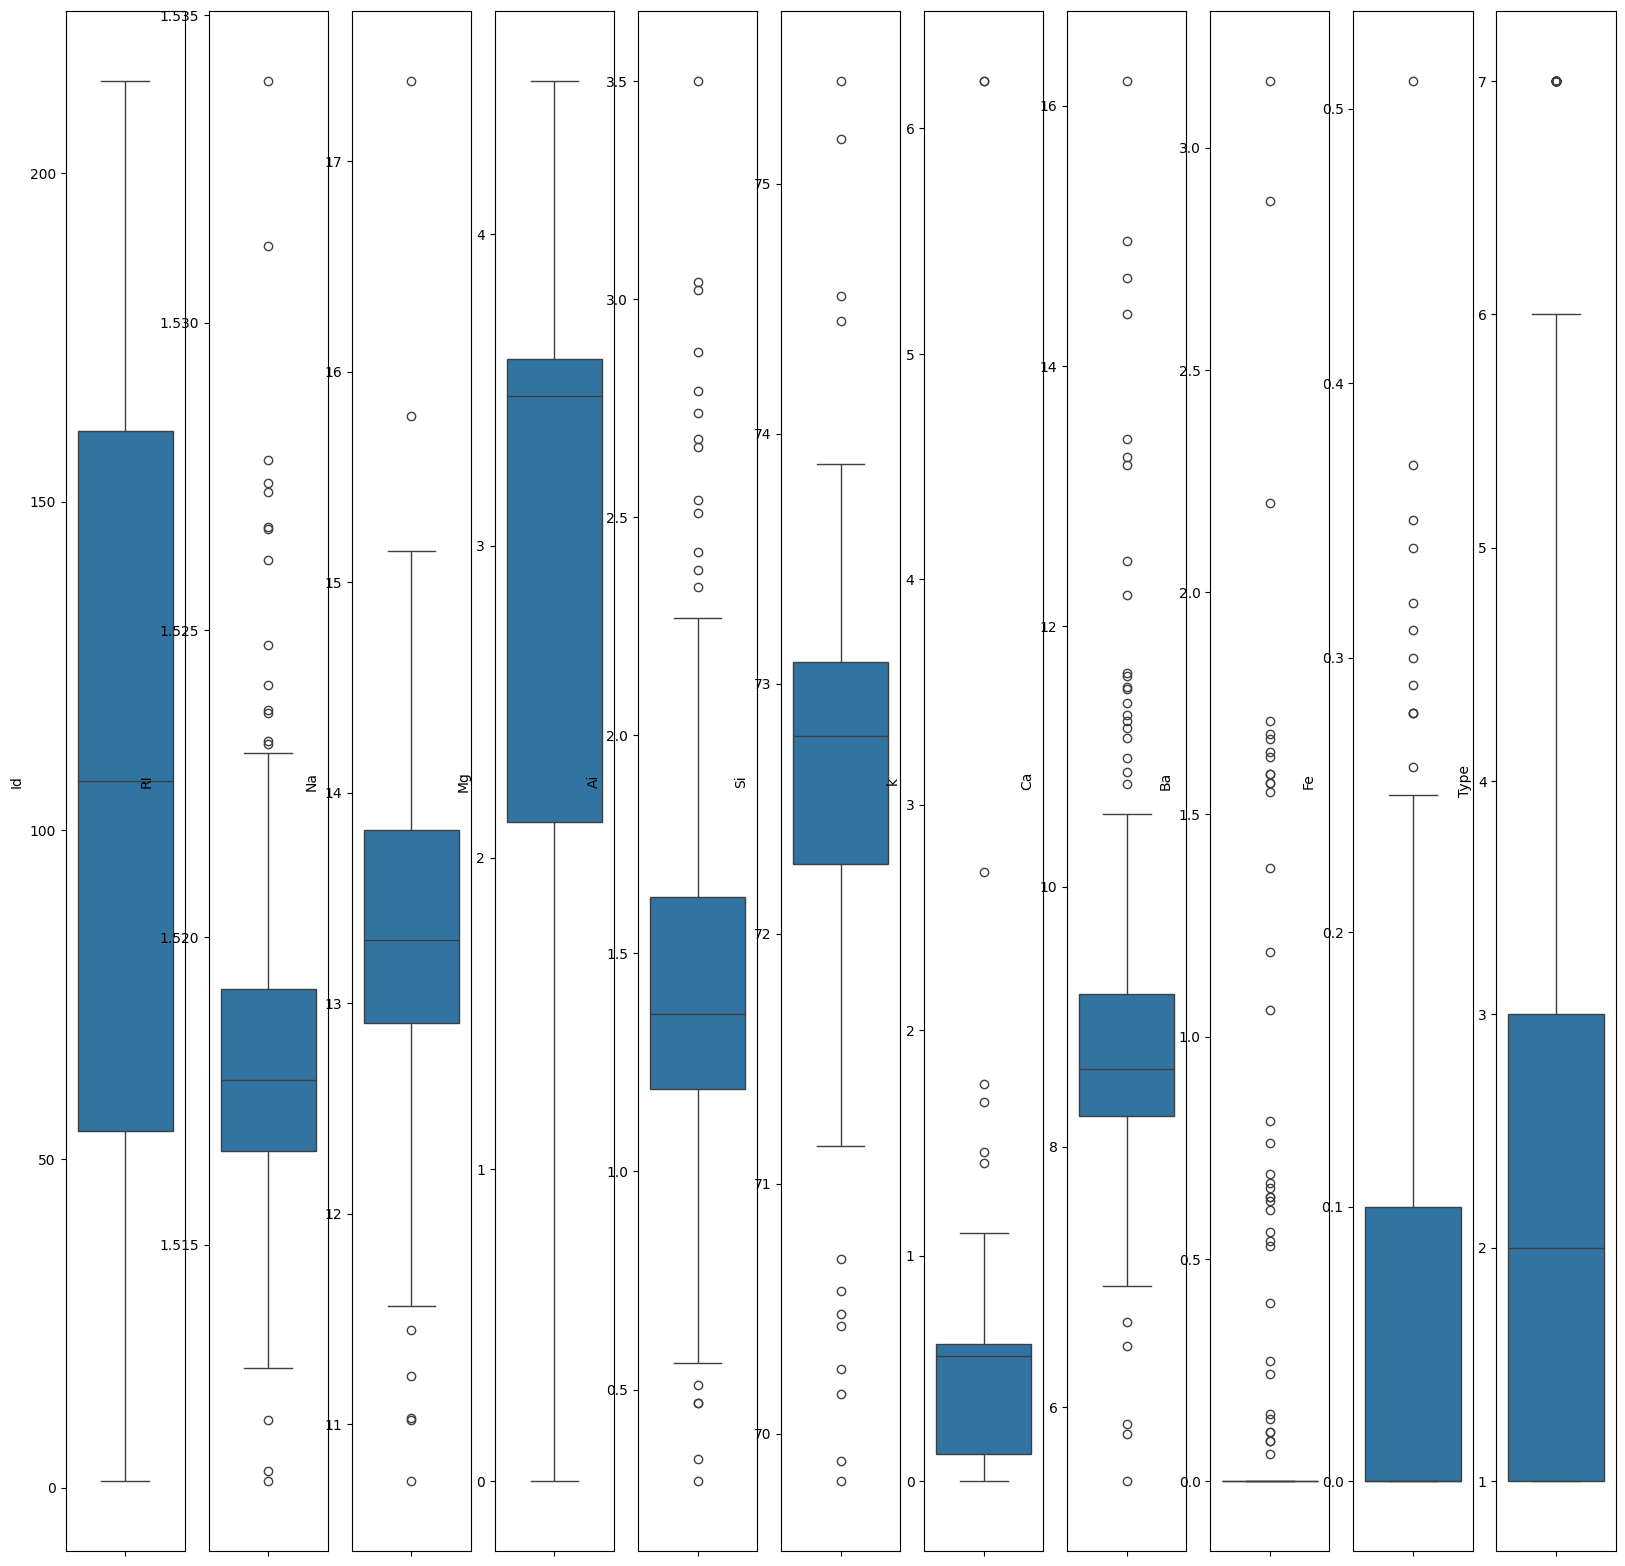

In [12]:
fig,ax=plt.subplots(1,11,figsize=(20,20))
for i ,col in enumerate(df_gi.columns):    
    sns.boxplot(y=df_gi[col],ax=ax[i])

In [ ]:
                                    UNIVARIATE ANALYSIS 

<Axes: >

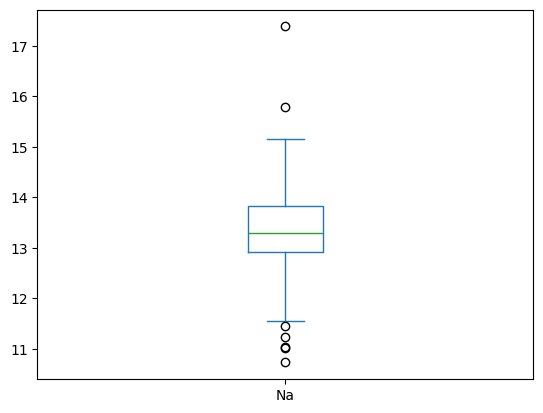

In [13]:
df_gi['Na'].plot(kind='box')

<Axes: >

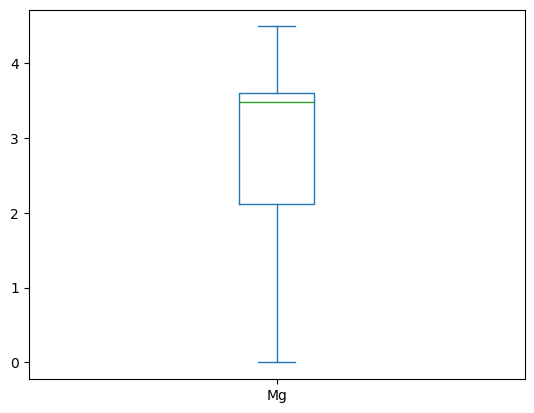

In [14]:
df_gi['Mg'].plot(kind='box')

<Axes: >

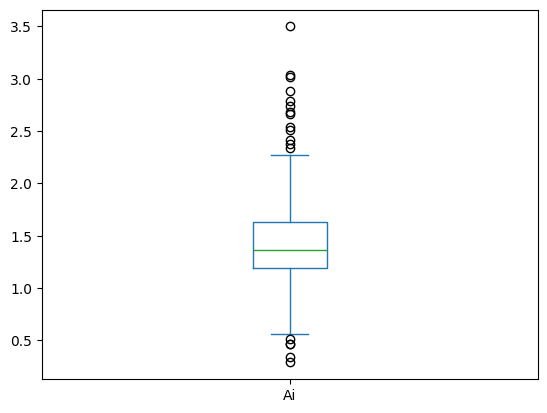

In [15]:
df_gi['Ai'].plot(kind='box')

<Axes: >

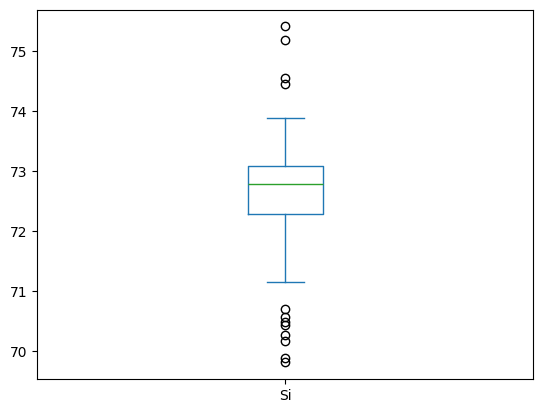

In [16]:
df_gi['Si'].plot(kind='box')

<Axes: >

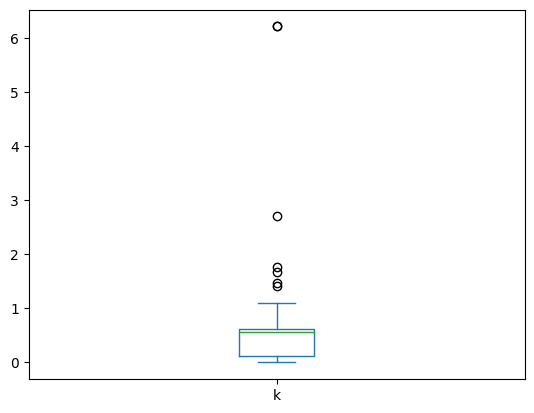

In [17]:
df_gi['k'].plot(kind='box')

<Axes: >

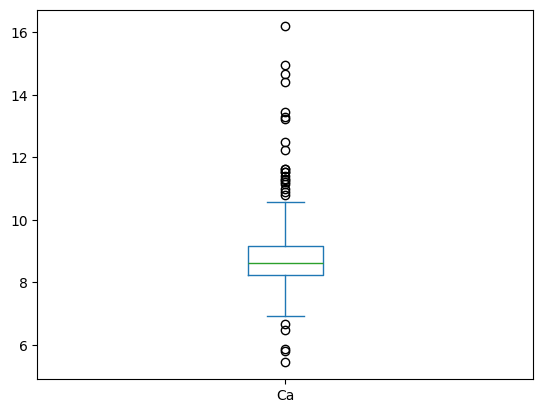

In [18]:
df_gi['Ca'].plot(kind='box')

In [19]:
df_gi_new['Ba'].plot(kind='box')

NameError: name 'df_gi_new' is not defined

<Axes: >

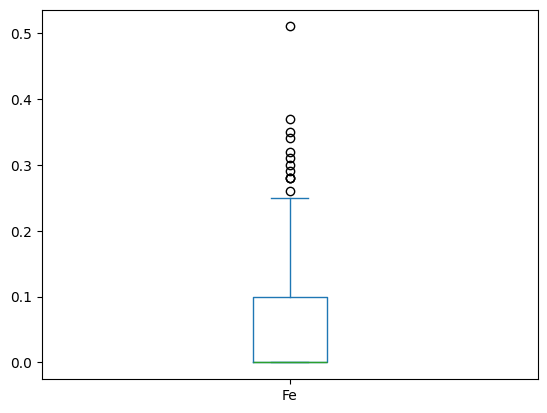

In [62]:
df_gi['Fe'].plot(kind='box')

<Axes: >

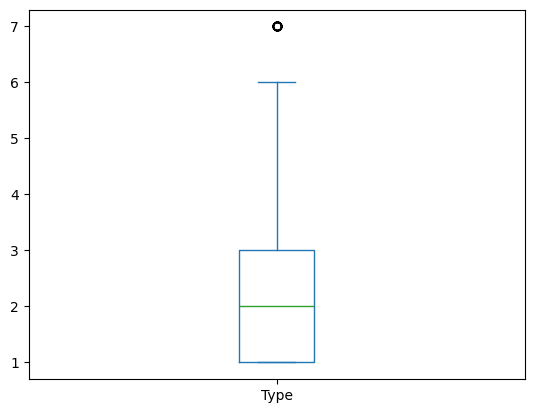

In [63]:
df_gi['Type'].plot(kind='box')

In [64]:
# here we have checked outliers for every columns and observed that outliers are present in every columns

In [20]:
df_gi.describe(include='all')

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [21]:
#here as per the statistical summary it is observed that data is not in  normal distribution mostly have positive skewness 

In [22]:
for i in df_gi.columns:
    print(df_gi[i].value_counts())

Id
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: count, Length: 214, dtype: int64
RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64
Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64
Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64
Ai
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64
Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64
k
0.00    30
0.57    12
0.56    11

In [23]:
df_gi['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [ ]:
#here it is clear that the target variable have imbalance dataset and also our independent featue

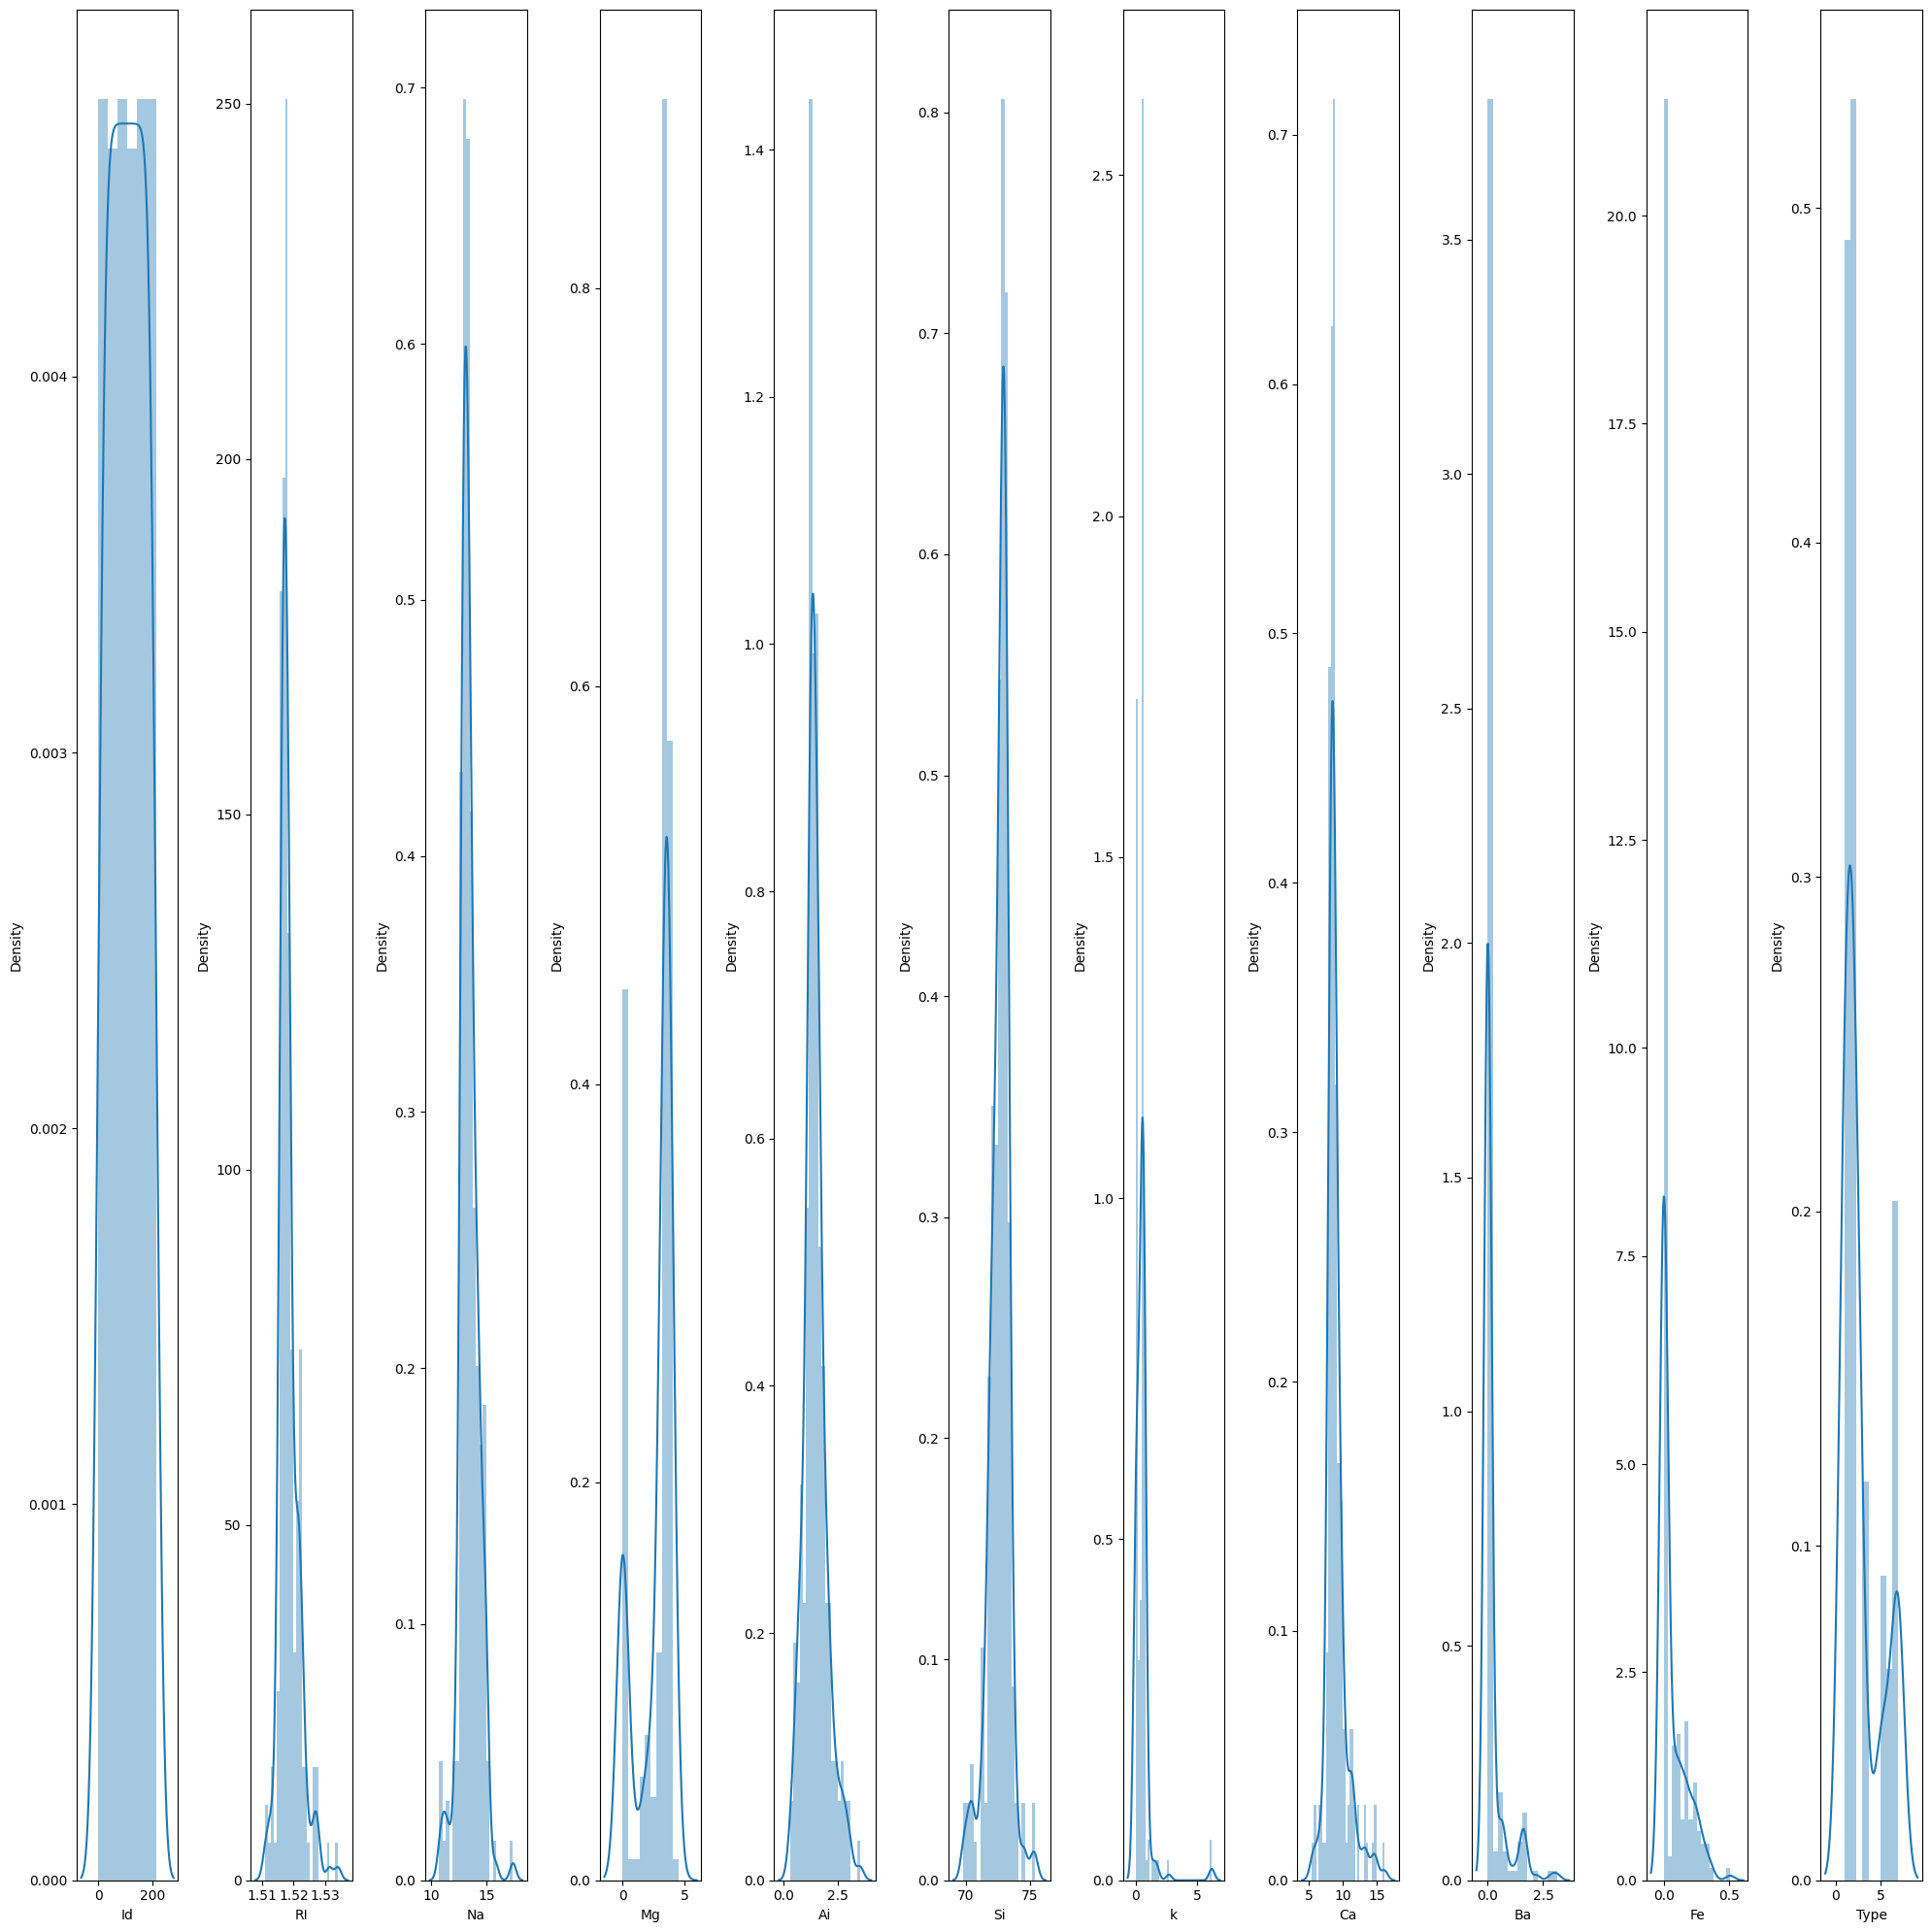

In [22]:
fig,ax=plt.subplots(1,11,figsize=(20,20))
for i ,col in enumerate(df_gi.columns):    
    sns.distplot(df_gi[col],ax=ax[i])
plt.tight_layout()
plt.show()

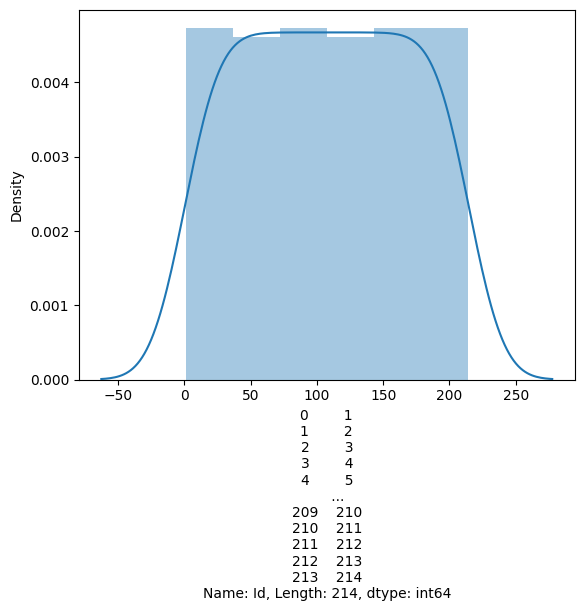

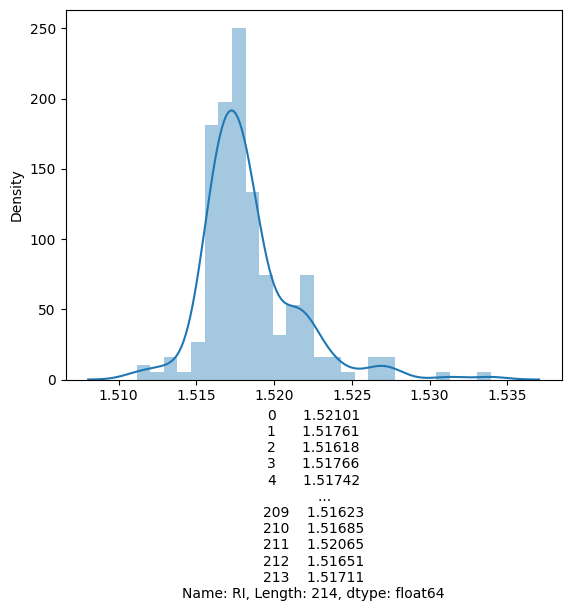

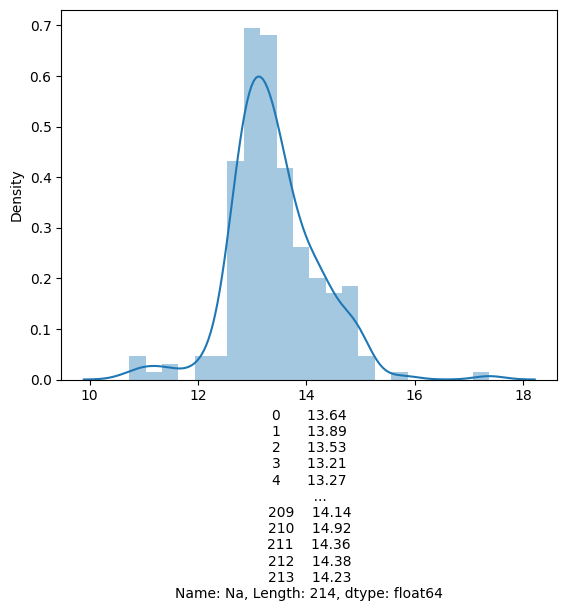

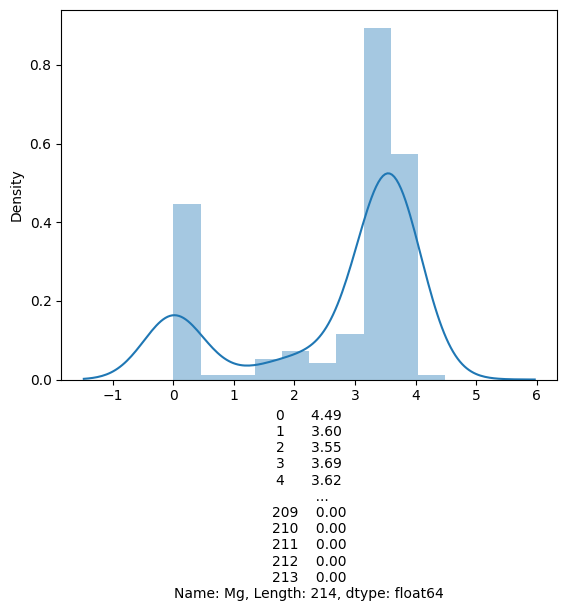

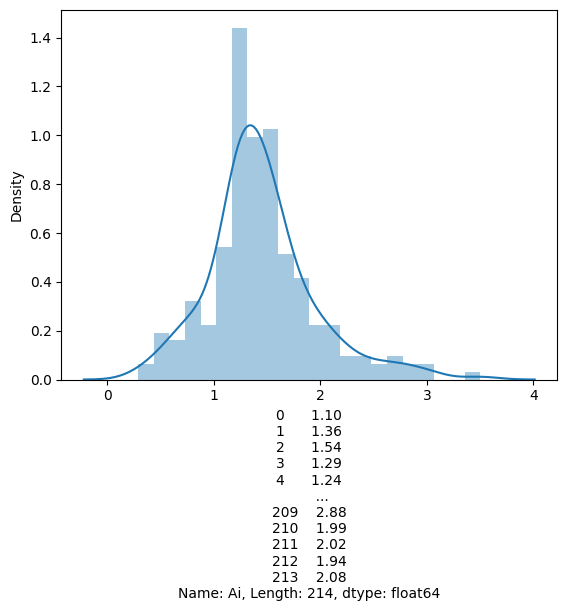

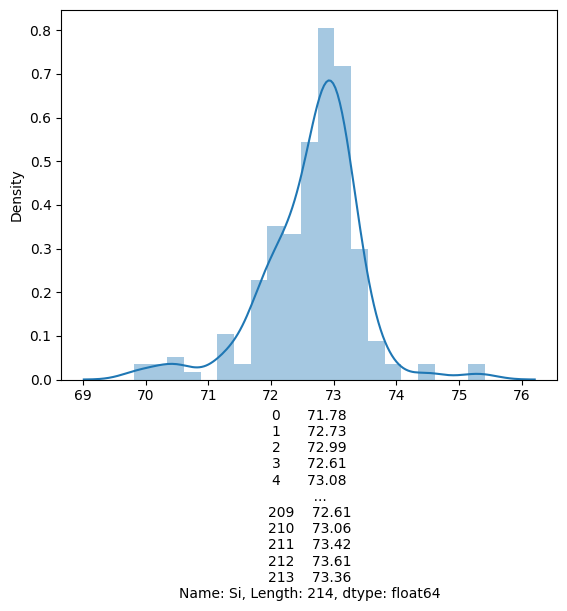

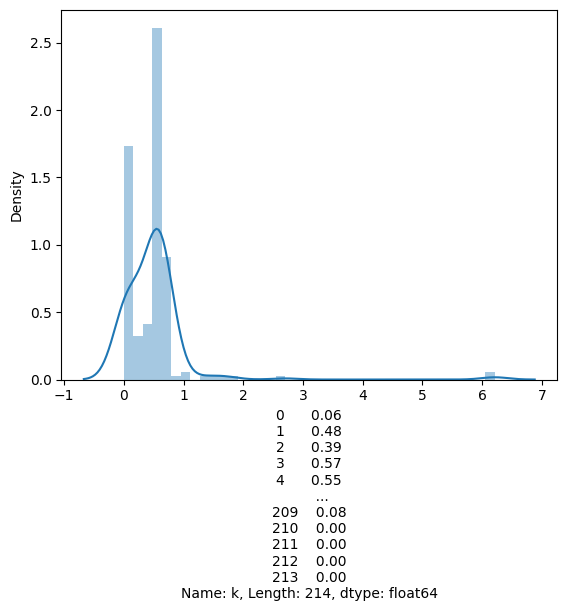

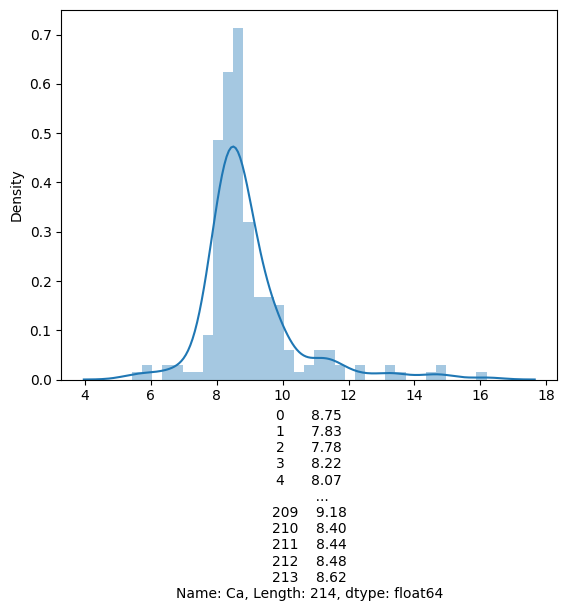

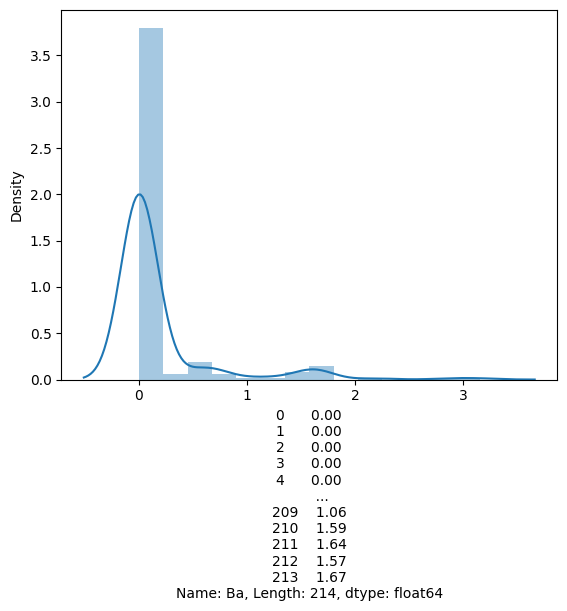

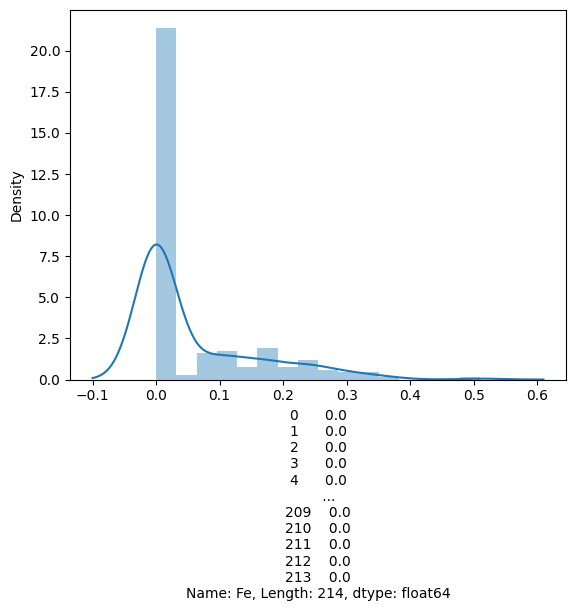

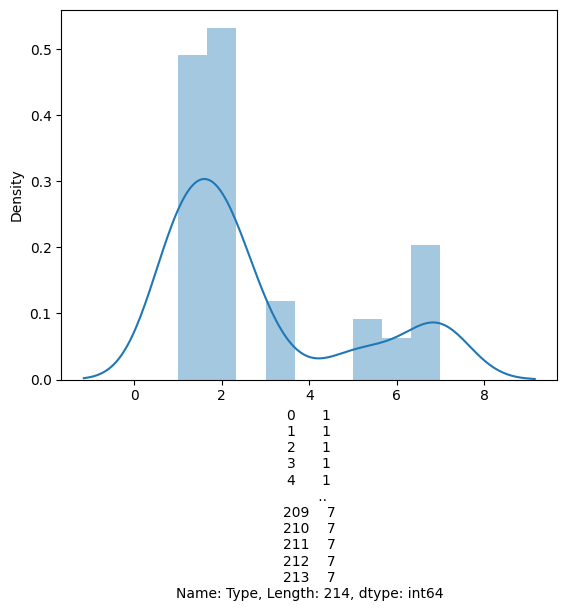

In [24]:
for i in df_gi.columns:
    sns.distplot(df_gi[i])
    plt.xlabel(df_gi[i])
    plt.show()
    

In [ ]:
#here from the distplot also it is cleat that the data in dataset is not  normally distributed have positive skewness in the feature

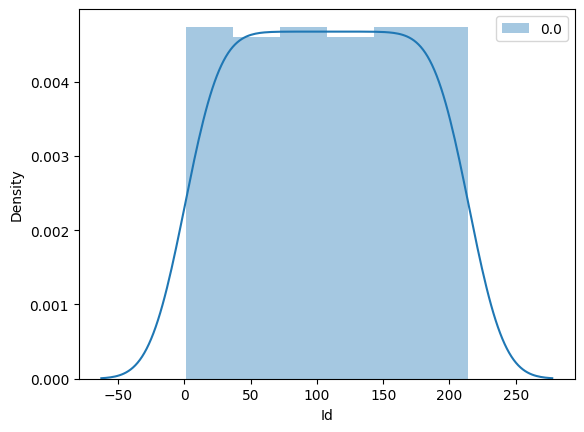

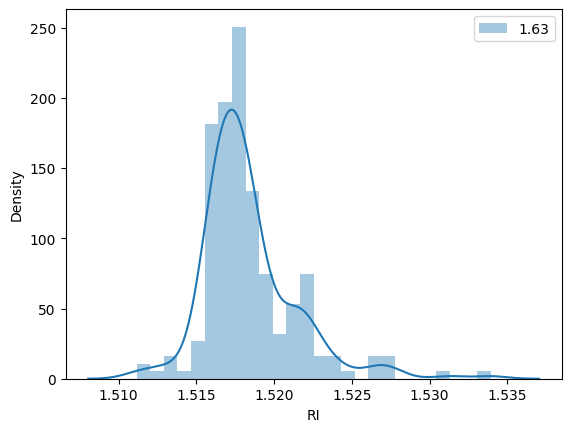

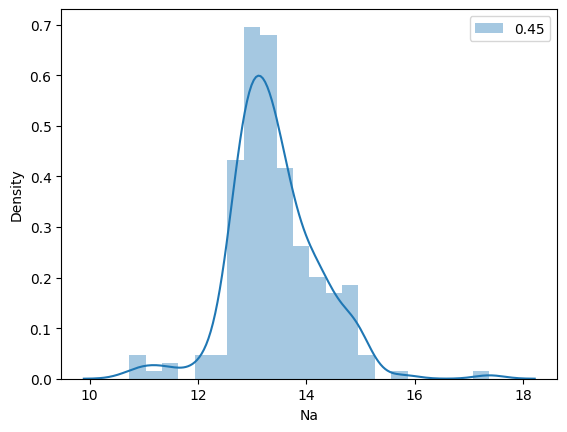

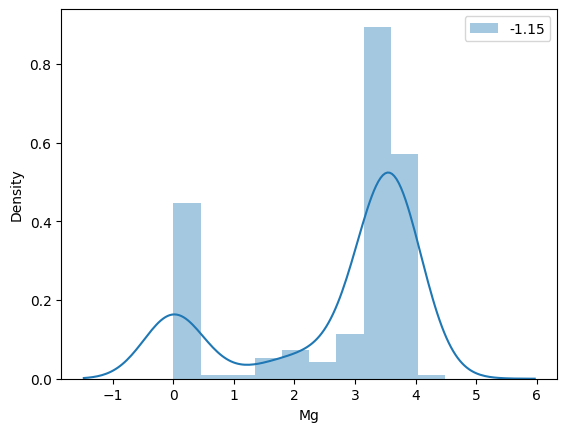

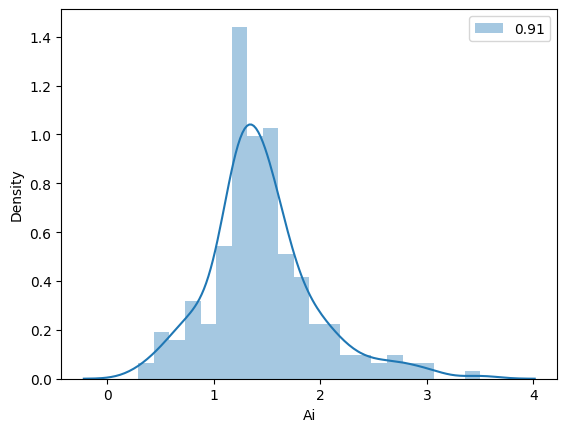

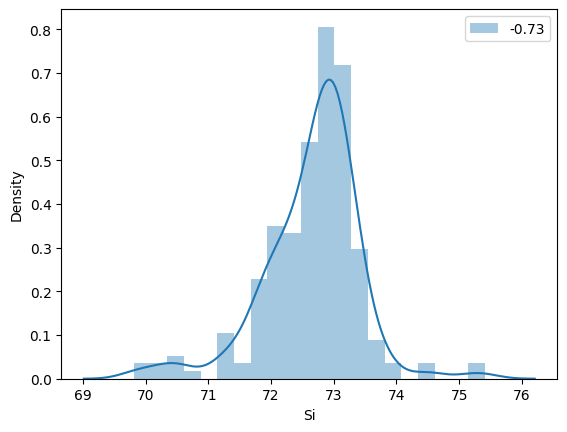

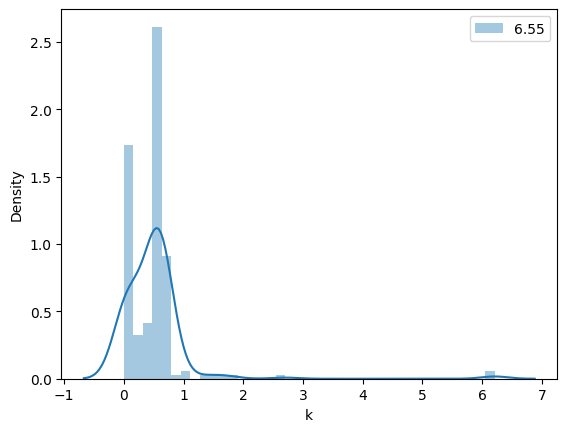

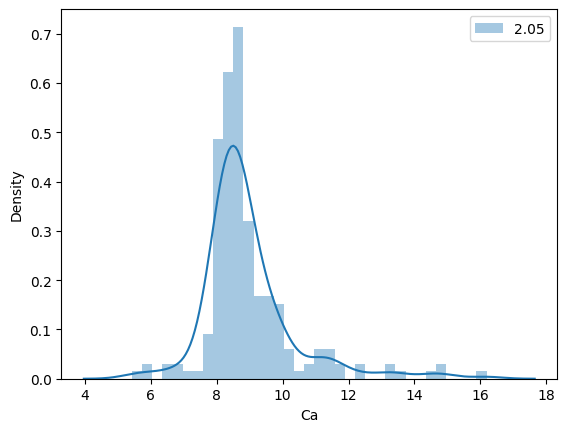

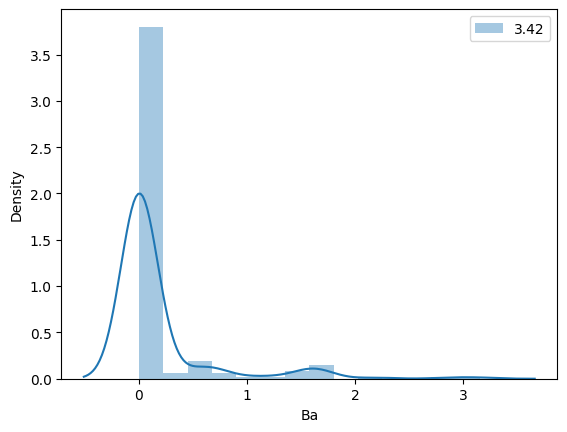

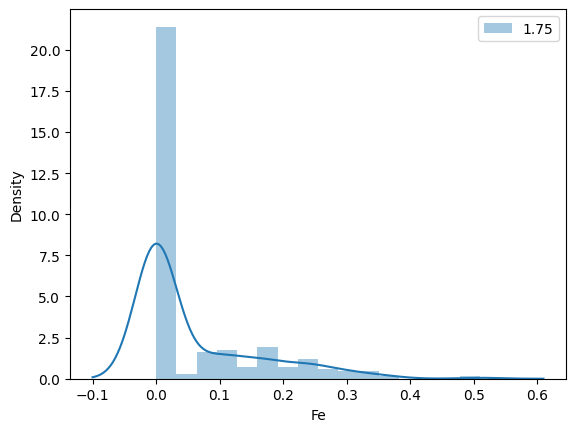

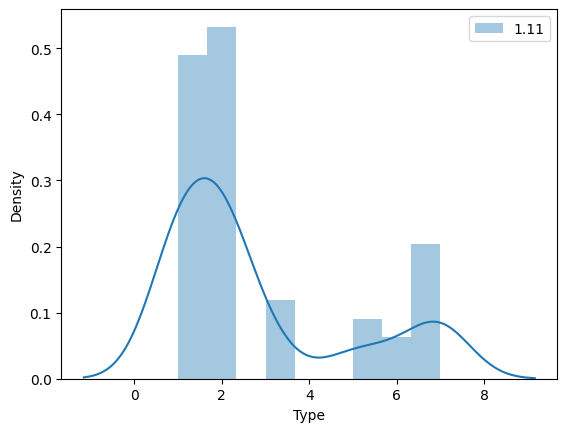

In [105]:
for i in df_gi:
    skew = df_gi[i].skew()
    sns.distplot(df_gi[i], kde= True, label=skew.round(2))
    plt.legend(loc='best')
    plt.show()
     


In [25]:

correlation=df_gi.corr()

<Axes: >

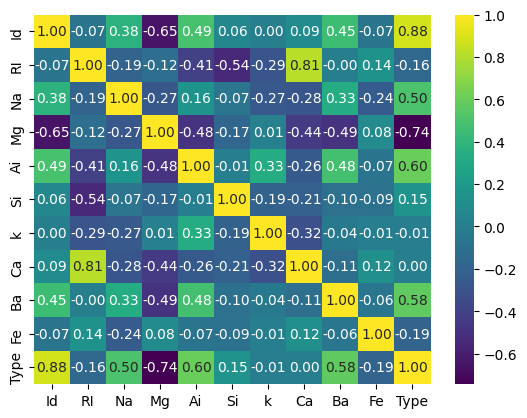

In [26]:
sns.heatmap(correlation,cmap='viridis',annot=True,fmt='.2f')

-> here from the above heat map we observed that RI and Ca have strong correlation with each other and the feature Ai and Ba have intermediate correlation with each other

In [27]:
df_gi['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [ ]:
#here it isclear that majority of records in the dataset is of window glass type as type 1-4 belongs to window glass and  type 5-7 belongs to non window glass

<Axes: xlabel='Type', ylabel='count'>

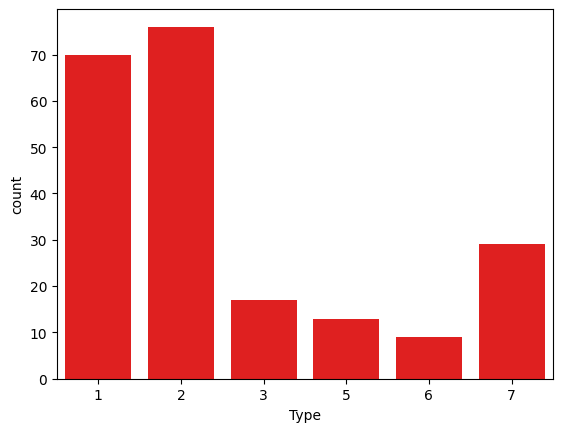

In [28]:
sns.countplot(x='Type',data=df_gi,color='red')

from the above countplot it is clear that data is not balanced  in the target varibale so we need to balance the 

In [29]:
df_gi[50:100]

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe,Type
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
51,52,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1
52,53,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,1
53,54,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1
54,55,1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.00,0.09,1
55,56,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1
56,57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
57,58,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.00,0.00,1
58,59,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.00,0.00,1
59,60,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00,0.11,1


<Axes: xlabel='Type', ylabel='Mg'>

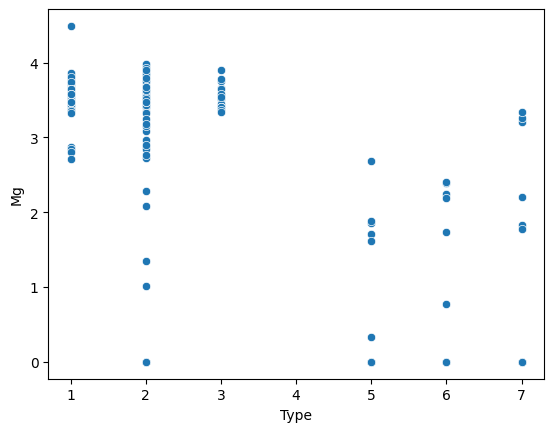

In [30]:
sns.scatterplot(x=df_gi['Type'],y=df_gi['Mg'],data=df_gi)

here it is clear that as per the correlation we have seen that target variable is negatively correlated with Mg so as the class Type increases the density of data points decreases

<Axes: xlabel='Fe', ylabel='Type'>

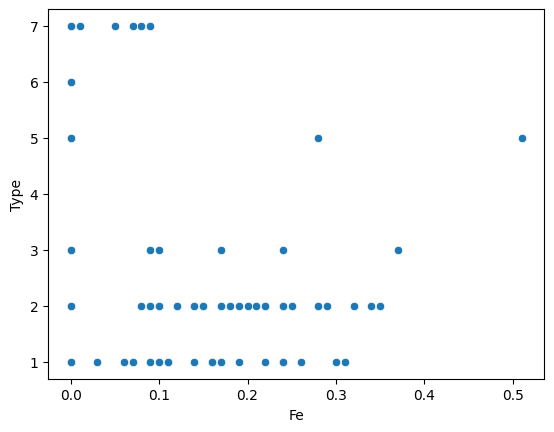

In [31]:
sns.scatterplot(x=df_gi['Fe'],y=df_gi['Type'],data=df_gi)

<Axes: xlabel='Type', ylabel='Ai'>

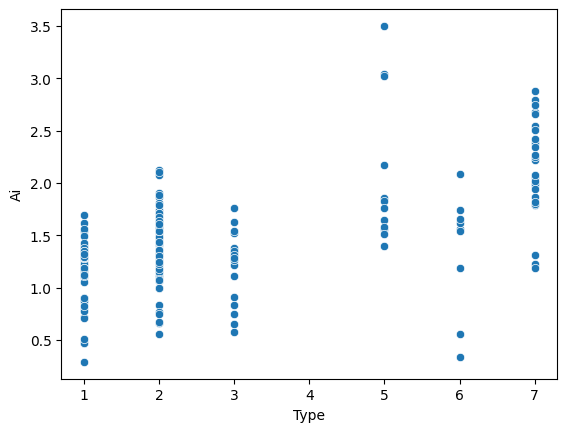

In [32]:
sns.scatterplot(x=df_gi['Type'],y=df_gi['Ai'],data=df_gi)

here from the correaltion we have seen that Ai is highly correlated with target variable as the value of type class increases weight percentage of Ai also increases.we oserved that if the weight percentage of Ai is mmore than it belongs to non window glass

In [33]:
#checking for outliers through code also
def check_outlier(data):
    mean=np.mean(data)
    std=np.std(data)
    z_score=(data-mean)/std
    print ('z score are  ',z_score)
    outliers = [data_point for data_point, z_scores in zip(data, z_score) if z_scores > 3]
    print(f'\nThe outliers in the dataset is {outliers}')

In [55]:
data=df_gi['Na']
check_outlier(data)

z score are   0      0.284953
1      0.591817
2      0.149933
3     -0.242853
4     -0.169205
         ...   
209    0.898681
210    1.856097
211    1.168721
212    1.193270
213    1.009152
Name: Na, Length: 214, dtype: float64

The outliers in the dataset is [17.38]


In [34]:
data=df_gi['Ba']
check_outlier(data)

z score are   0     -0.352877
1     -0.352877
2     -0.352877
3     -0.352877
4     -0.352877
         ...   
209    1.783978
210    2.852405
211    2.953200
212    2.812087
213    3.013677
Name: Ba, Length: 214, dtype: float64

The outliers in the dataset is [3.15, 2.2, 1.68, 1.71, 2.88, 1.67]


In [35]:
data=df_gi['Mg']
check_outlier(data)

z score are   0      1.254639
1      0.636168
2      0.601422
3      0.698710
4      0.650066
         ...   
209   -1.865511
210   -1.865511
211   -1.865511
212   -1.865511
213   -1.865511
Name: Mg, Length: 214, dtype: float64

The outliers in the dataset is []


<Axes: >

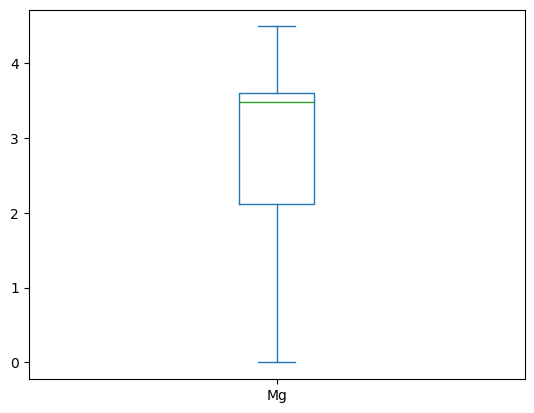

In [36]:
df_gi['Mg'].plot(kind='box')


#from the code and from the boxplot it is clear that we dont have outliers present in Mg feature

In [ ]:
        #seperating the independent feature and Target feature

In [37]:
x=df_gi.iloc[:,0:10]

In [38]:
x

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [39]:
y=df_gi.iloc[:,-1]

In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [ ]:
    # removing outliers from the dataset using Zscore

In [41]:
z=np.abs(zscore(df_gi))

In [42]:
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [43]:
df_gi.iloc[107,7]

16.19

In [44]:
df_gi_new=df_gi[(z<3).all(axis=1)]

In [45]:
df_gi_new

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [46]:
df_gi_new.describe()

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe,Type
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,102.221649,1.518062,13.416959,2.880000,1.422732,72.720619,0.431546,8.824639,0.123351,0.051598,2.618557
std,61.530795,0.002288,0.673292,1.308715,0.443786,0.584852,0.282287,0.989154,0.357125,0.085782,2.030561
min,1.000000,1.511310,11.030000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.250000,1.516513,12.945000,2.855000,1.190000,72.372500,0.132500,8.240000,0.000000,0.000000,1.000000
50%,97.500000,1.517635,13.305000,3.500000,1.360000,72.820000,0.555000,8.585000,0.000000,0.000000,2.000000
75%,153.750000,1.518995,13.787500,3.610000,1.602500,73.087500,0.600000,9.077500,0.000000,0.090000,3.000000
max,213.000000,1.527250,15.150000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


In [47]:
df_gi=df_gi_new

In [48]:
df_gi.describe()

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe,Type
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,102.221649,1.518062,13.416959,2.880000,1.422732,72.720619,0.431546,8.824639,0.123351,0.051598,2.618557
std,61.530795,0.002288,0.673292,1.308715,0.443786,0.584852,0.282287,0.989154,0.357125,0.085782,2.030561
min,1.000000,1.511310,11.030000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.250000,1.516513,12.945000,2.855000,1.190000,72.372500,0.132500,8.240000,0.000000,0.000000,1.000000
50%,97.500000,1.517635,13.305000,3.500000,1.360000,72.820000,0.555000,8.585000,0.000000,0.000000,2.000000
75%,153.750000,1.518995,13.787500,3.610000,1.602500,73.087500,0.600000,9.077500,0.000000,0.090000,3.000000
max,213.000000,1.527250,15.150000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


In [49]:
x=df_gi.iloc[:,0:10]

In [50]:
y=df_gi.iloc[:,-1]

In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 194, dtype: int64

In [52]:
y_value=df_gi['Type'].apply(lambda x: 1 if x<=4 else 0)

In [53]:
y_value.value_counts()

Type
1    154
0     40
Name: count, dtype: int64

In [ ]:
#here we have observed thar among 214 records 154 records are of window glass category and 40 records are of non window glass category

In [54]:
for i in y_value:
    if i==1:
        print('window glass')
    else:
        print('non window glass')

window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass
window glass

# here we are scaling our independent features using Standard scaler as it is very important preprocessing steps for dataset to keep the data value in same scale  

In [55]:
y=y_value

In [56]:
scale_data_x=StandardScaler()
x=pd.DataFrame(scale_data_x.fit_transform(x),columns=x.columns)
x

,Id,RI,Na,Mg,Ai,Si,k,Ca,Ba,Fe
0,-1.649313,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056
1,-1.633019,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056
2,-1.616725,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056
3,-1.600431,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056
4,-1.584137,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056
...,...,...,...,...,...,...,...,...,...,...
189,1.739854,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056
190,1.756148,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056
191,1.772442,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056
192,1.788737,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056


In [57]:
df_gi.skew()

Id      0.107537
RI      0.952733
Na      0.371482
Mg     -1.528849
Ai      0.658259
Si     -0.425450
k       0.303175
Ca      1.077962
Ba      3.188587
Fe      1.486479
Type    1.284007
dtype: float64

In [ ]:
# here it is clear that the feature Ba ,ca,Fe have positive skewness 

In [62]:
df_gi['Ba']=np.cbrt(df_gi['Ba'])

In [59]:
df_gi['Ca']=np.cbrt(df_gi['Ca'])

In [60]:
df_gi['Fe']=np.cbrt(df_gi['Fe'])

In [63]:
df_gi.skew()

Id      0.107537
RI      0.952733
Na      0.371482
Mg     -1.528849
Ai      0.658259
Si     -0.425450
k       0.303175
Ca      0.611914
Ba      1.923662
Fe      0.883166
Type    1.284007
dtype: float64

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,5.391407,RI
1,3.271497,Na
2,2.163785,Ai
3,2.737021,Si
4,3.013948,k
5,3.183225,Ca
6,2.108446,Ba
7,1.064526,Fe


In [65]:
x.drop('Id',axis=1,inplace =True)

In [66]:
x.drop('Mg',axis=1,inplace =True)

#from the heat map i have checked firt which column is highly negatively correlated with target variable and other independent feature then we observed that magnesium is highly negatively correlated with other feature and to remove multicollinerity i have drop Mg feature then we obsserved that vif of all the feature are now in acceptable range of -5 to +5

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)


In [70]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
303    0
304    0
305    0
306    0
307    0
Name: Type, Length: 308, dtype: int64

In [71]:
y1.value_counts()

Type
1    154
0    154
Name: count, dtype: int64

In [ ]:
# here after applying smote now the target variale has balance dataset

In [72]:
x1.value_counts()

RI         Na         Ai         Si         k          Ca         Ba         Fe       
 1.782477   1.180904  -2.152380  -1.629607  -1.142025   0.755484  -0.346292  -0.603056    2
-2.957998   0.406581   0.874903   0.153223   4.718223  -3.440742   2.994493  -0.603056    1
 0.248172   1.240944   0.141644  -0.380044  -1.532708   0.603048  -0.346292  -0.603056    1
 0.227927   1.232213   0.567045  -0.136787  -1.532708   0.611676  -0.346292  -0.603056    1
 0.200858   1.002214   0.536028  -0.086773  -1.532708   0.502088  -0.346292  -0.603056    1
                                                                                         ..
-0.596523  -0.263506  -0.096539  -0.035346   0.456224  -0.389863  -0.346292   0.565704    1
-0.608577   2.112770   1.986360   0.977548  -1.532708  -0.005074   1.521830  -0.603056    1
-0.609667  -0.710231  -0.367639   0.050367   0.456224  -0.227690  -0.346292  -0.603056    1
-0.614048  -0.829358   0.920086   1.987480   1.912407   1.363632  -0.346292  -0.60305

In [73]:
x1.shape

(308, 8)

In [74]:
y1.shape

(308,)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [76]:
maxac=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 1.0 at random state 6


In [ ]:
#here in Random Forest classifier model is overfitted 

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        40

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [78]:
c_matrix=confusion_matrix(y_test,pred)
print(c_matrix)

[[52  1]
 [ 0 40]]


Text(45.722222222222214, 0.5, 'actual value')

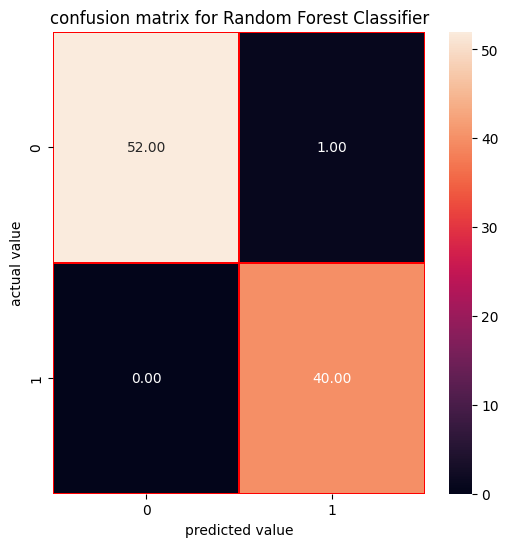

In [79]:
                   #printing confusion matrics using heatmap()
x_labels=['0','1']
y_labels=['0','1']
plt.figure(figsize=(6,6))
sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
plt.title('confusion matrix for Random Forest Classifier')
plt.xlabel('predicted value')
plt.ylabel('actual value')


In [80]:
def classification_models(model,x,y,x_test,y_test):
     
    model.fit(x,y)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')


   
    

0.989247311827957
[[52  1]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        40

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



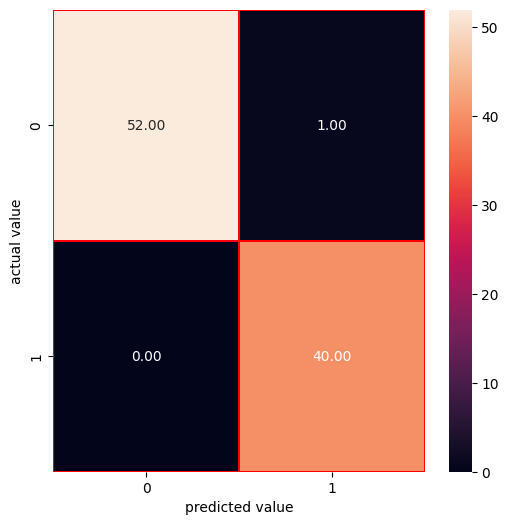

In [81]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

1.0
[[53  0]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        40

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



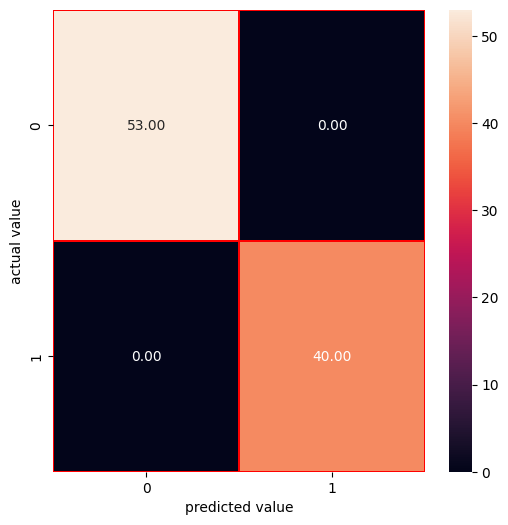

In [82]:
svc=SVC()
classification_models(svc,x_train,y_train,x_test ,y_test)

0.989247311827957
[[52  1]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        40

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



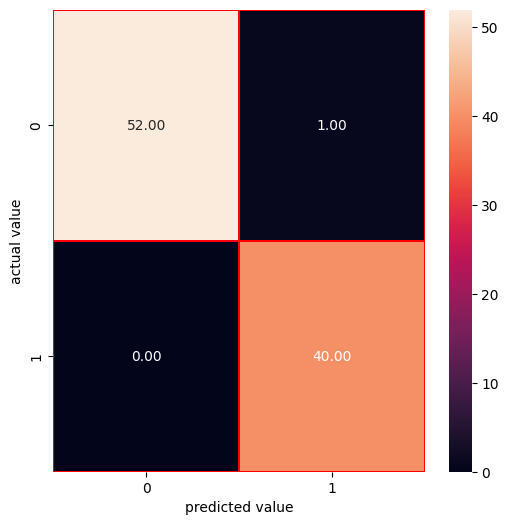

In [83]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.978494623655914
[[51  2]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.95      1.00      0.98        40

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



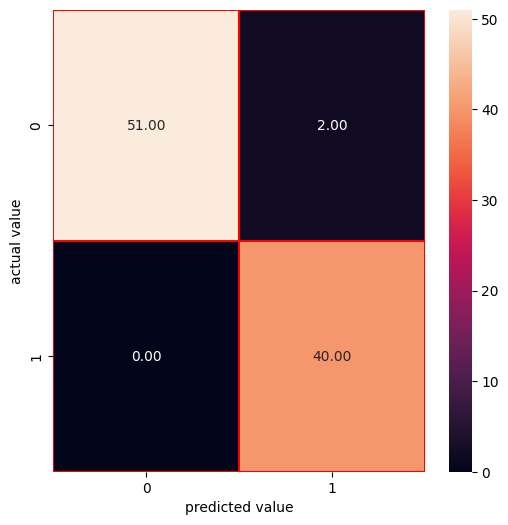

In [84]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

1.0
[[53  0]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        40

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



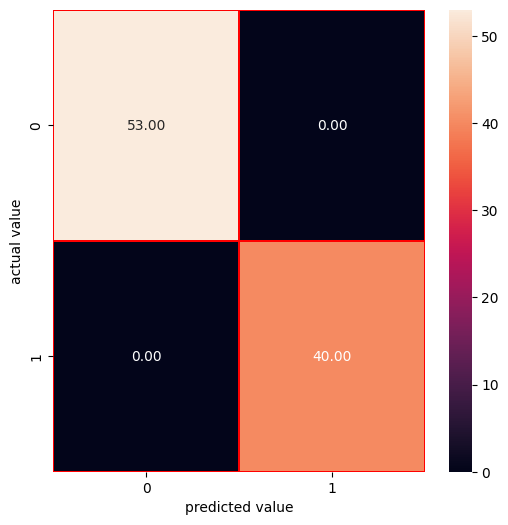

In [85]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.967741935483871
[[50  3]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.93      1.00      0.96        40

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



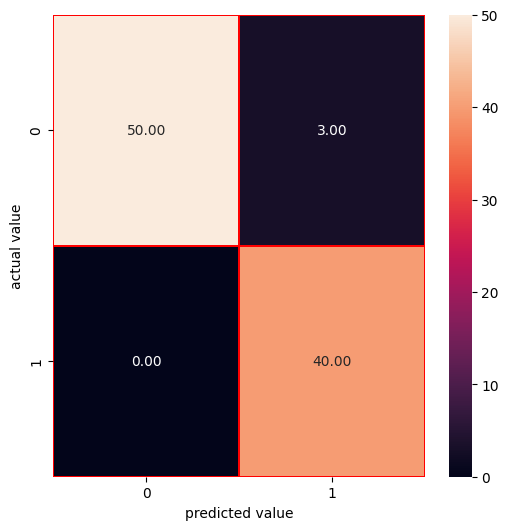

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

0.967741935483871
[[50  3]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.93      1.00      0.96        40

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



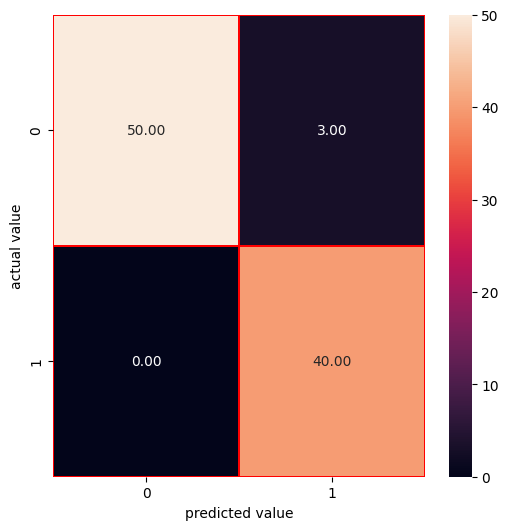

In [87]:
knn=KNeighborsClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)


In [143]:

def cross_validation(model,x1,y1):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [144]:
# checking cross_val score for Logistic Regression
cross_validation(LR,x1,y1)


[0.93548387 0.98387097 1.         0.93442623 0.98360656]
0.9674775251189847
differnce between accuracy score and cross validation is 0.02176978670897234


In [135]:
# checking cross_validation score for Random Forest Classifer
cross_validation(RFC,x1,y1)


[0.98387097 1.         0.96774194 0.95081967 1.        ]
0.9804865150713908
differnce between accuracy score and cross validation is 0.008760796756566158


In [142]:
#checking cross validation for ExtraTreesClassifier
cross_validation(etc,x1,y1)


[0.98387097 1.         0.98387097 0.98360656 0.98360656]
0.9869910100475939
differnce between accuracy score and cross validation is 0.002256301780363068


In [137]:
#checking cross validation for GradientBoostingClassifier
cross_validation(gbc,x1,y1)


[0.91935484 0.98387097 0.98387097 0.90163934 0.96721311]
0.9511898466419882
differnce between accuracy score and cross validation is 0.027304777013925752


In [138]:
# checking cross validaton for decision tree classifer
cross_validation(dtc,x1,y1)


[0.9516129  0.9516129  0.96774194 0.90163934 0.95081967]
0.9446853516657854
differnce between accuracy score and cross validation is 0.02305658381808562


In [151]:
final_model=etc.fit(x_train,y_train)
pred=final_model.predict(x_test)
score=cross_val_score(etc,x_train,y_train)
print(score.mean())

0.9674418604651163


In [152]:
accuracy=final_model.score(x_test,y_test)
print (accuracy)


0.978494623655914


# here I have selected GradietBoostingClassifier as my final model  as the differnce between accuracy score and cross validation score is very less

In [153]:
import joblib
joblib.dump(final_model,'glass_identification.pkl')

['glass_identification.pkl']

In [154]:
model=joblib.load('glass_identification.pkl')

In [155]:
prediction=model.predict(x_test)
prediction

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0], dtype=int64)

In [156]:
dummy_test=np.array(y_test)

In [158]:
df=pd.DataFrame()
df['predicted']=prediction
df['orignal']=dummy_test
df

,predicted,orignal
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
88,1,1
89,0,0
90,1,1
91,0,0
